In [91]:
#8. Give us the statistical summary for all the variables in the dataset.
import pandas as pd 
df = pd.read_csv(r'C:\Users\sagar\Downloads\Bank Personal Loan Modelling.csv')
# Display the first few rows of the DataFrame 

df.describe() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [92]:
#Evaluate the measures of central tendency and measures of dispersion for all the quantitative variables in the dataset.
# Select quantitative variables 
quantitative_vars = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'] 
# Measures of central tendency and dispersion 
summary = df[quantitative_vars].agg(['mean', 'median', 'var', 'std', 'min', 'max']) 
summary 

,Age,Experience,Income,CCAvg,Mortgage
mean,45.338400,20.104600,73.774200,1.937938,56.498800
median,45.000000,20.000000,64.000000,1.500000,0.000000
var,131.404166,131.513962,2119.104235,3.054312,10345.697538
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


10. Linear Relationship Between Age and Experience + Plot 

Pearson correlation between Age and Experience: 0.9942148569683318


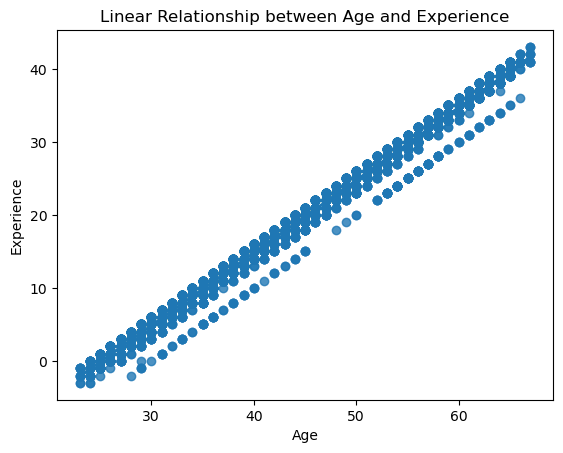

In [23]:
#What statistical method will you use to examine the presence of a linear relationship between 
#age and experience variables? Also, create a plot to illustrate this relationship.


import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import pearsonr 
# Correlation coefficient (Pearson's r) to check the linear relationship 
corcof, _ = pearsonr(df['Age'], df['Experience']) 
print(f"Pearson correlation between Age and Experience: {corcof}") 
# Scatter plot with linear fit 
sns.regplot(x='Age', y='Experience', data=df) 
plt.title("Linear Relationship between Age and Experience") 
plt.show() 

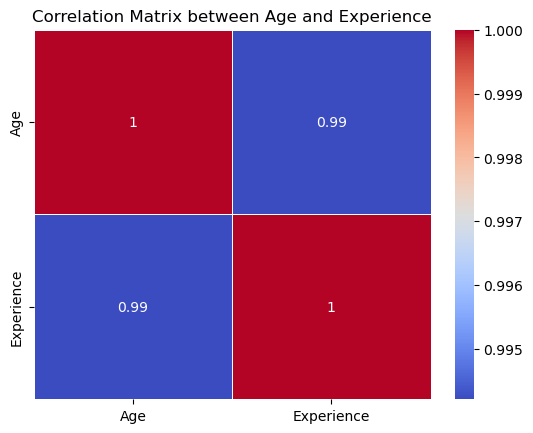

In [19]:
##sns.regplot(x='Age', y='Experience', data=data)
# Select the relevant columns for correlation
correlation_matrix = df[['Age', 'Experience']].corr()
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Add a title to the plot
plt.title("Correlation Matrix between Age and Experience") 

# Display the plot
plt.show()


In [30]:
# What is the most frequent family size observed in this dataset?
mostfrequentfamilysize = df['Family'].mode()[0] 


print(mostfrequentfamilysize)

1


In [90]:
# 12. Percentage of Variation in 'Income' Variable 
POV = (df['Income'].std() / df['Income'].mean()) * 100 
print(f"Percentage of variation in 'Income' variable: {POV}%") 

Percentage of variation in 'Income' variable: 62.39814097758612%


13. Imputation of 'Mortgage' Variable 

In [67]:
# The ‘Mortgage’ variable has a lot of zeroes. Impute with some business logical value that you feel fit for the data. Replace zeros with the median of non-zero mortgage values 
medmor = df.loc[df['Mortgage'] > 0, 'Mortgage'].median() 
print(medmor)


df['Mortgage'] = df['Mortgage'].replace(0, medmor) 
# Check the updated Mortgage column 
df['Mortgage'].isnull().sum()


153.0


0

14. Density Curve of CCAvg for Credit Card Holders 

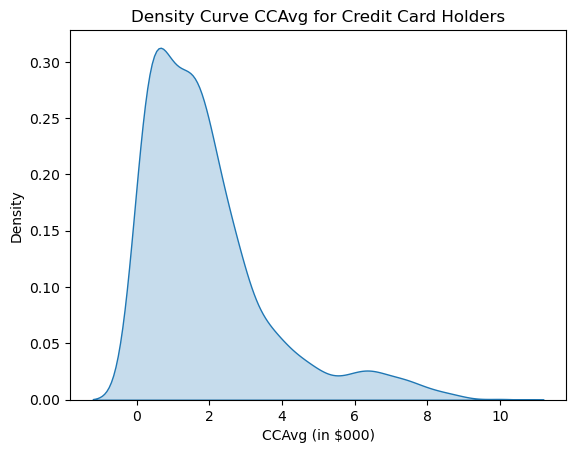

In [80]:
# Plot a density curve of the CCAvg variable for the customers who possess credit cards and write an interpretation about its distribution.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
credit_card_holders = df[df['CreditCard'] == 1] 


# Density plot of CCAvg 
sns.kdeplot(credit_card_holders['CCAvg'], fill=True, legend=True) 
plt.title("Density Curve CCAvg for Credit Card Holders") 
plt.xlabel("CCAvg (in $000)") 
plt.show()


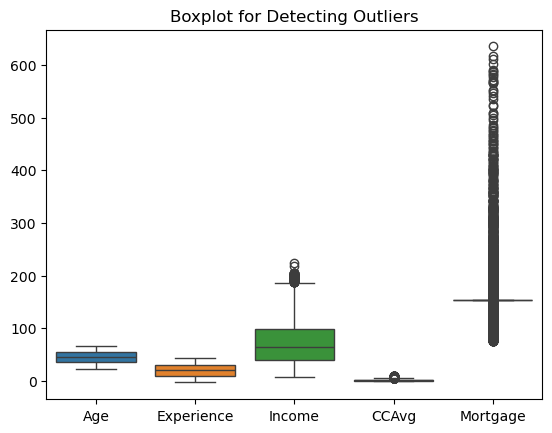

In [44]:
# Do you see any outliers in the dataset? If yes, what plot you would think will be suitable to showcase to the stakeholders?
sns.boxplot(df=df[quantitative_vars]) 
plt.title("Boxplot for Detecting Outliers") 
plt.show() 

16. Decile Values of 'Income' 

In [86]:
# Give us the decile values of the variable ‘Income’ in the dataset.
income_deciles = df['Income'].quantile([0.1 * i for i in range(1, 11)]) 

print(income_deciles) 



0.1     22.0
0.2     33.0
0.3     42.0
0.4     52.0
0.5     64.0
0.6     78.0
0.7     88.3
0.8    113.0
0.9    145.0
1.0    224.0
Name: Income, dtype: float64


In [50]:
# Give the IQR of all the variables which are quantitative and continuous.

iqr_values = df[quantitative_vars].quantile(0.75) - df[quantitative_vars].quantile(0.25) 

print(iqr_values) 

Age           20.0
Experience    20.0
Income        59.0
CCAvg          1.8
Mortgage       0.0
dtype: float64


In [87]:
# Do Higher-Income Holders Spend More on Credit Cards? 
corr_income_ccavg, _ = pearsonr(df['Income'], df['CCAvg']) 

print(f"Correlation between Income and Credit Card Average Spending: {corr_income_ccavg}") 

Correlation between Income and Credit Card Average Spending: 0.6459836696249653


19. How Many Customers Use Online Banking? Do They Have Higher Incomes? 

In [88]:
# Count of customers using online banking 

customers_count = df['ID'].count() 

print(f"Number of customers  {customers_count}") 

# Count of customers using online banking 

online_customers_count = df['Online'].sum() 

print(f"Number of customers using online banking: {online_customers_count}") 


# Compare income of online vs. non-online customers 

online_income = df[df['Online'] == 1]['Income'] 

non_online_income = df[df['Online'] == 0]['Income'] 


# Compare means 

print(f"Mean income of online banking customers: {online_income.mean()}") 

print(f"Mean income of non-online banking customers: {non_online_income.mean()}") 

Number of customers  5000
Number of customers using online banking: 2984
Mean income of online banking customers: 74.31166219839142
Mean income of non-online banking customers: 72.97867063492063


20. Number of Observations Outside ±3σ for 'Income' Variable 

In [25]:
# Z-scores for the Income variable 

mean_income = df['Income'].mean() 

std_income = df['Income'].std() 

# Calculate z-scores 

z_scores_income = (df['Income'] - mean_income) / std_income 

# Find the number of observations outside ±3σ 

outliers_count = ((z_scores_income > 3) | (z_scores_income < -3)).sum() 

print(f"Number of observations outside ±3σ: {outliers_count}") 

Number of observations outside ±3σ: 2
